# ***Demographic features :***

race: The patient’s racial group (Caucasian, AfricanAmerican, Asian, Hispanic, Other).

gender: The patient’s gender (Male, Female, or Unknown/Invalid).

age: Age group of the patient, given in 10-year intervals ([0-10), [10-20), …, [90-100)).

Hospitalization features

time_in_hospital: Length of stay (in days) for the current admission.

payer_code: Insurance/payment category (FR = private insurance, MC = Medicare, HM = HMO, etc.).

medical_specialty: The specialty of the physician primarily responsible for the admission (e.g., InternalMedicine, Cardiology, Surgery, etc.).

Procedures and medications

num_lab_procedures: Number of lab tests ordered during this encounter.

num_procedures: Number of procedures (other than lab work) performed during this encounter.

num_medications: Number of medications prescribed during this encounter.

number_outpatient: Number of outpatient visits in the year before admission.

number_emergency: Number of emergency visits in the year before admission.

number_inpatient: Number of inpatient visits in the year before admission.

Diagnosis features

diag_1: Primary diagnosis (ICD-9 code).

diag_2: Secondary diagnosis (ICD-9 code).

diag_3: Additional diagnosis (ICD-9 code).

number_diagnoses: Total number of distinct diagnoses recorded for the patient during this encounter.

Lab results

max_glu_serum: Maximum glucose serum test result. Values:

200 (greater than 200 mg/dl)

300 (greater than 300 mg/dl)

Norm (normal)

None (test not taken).

A1Cresult: Hemoglobin A1c test result (measure of long-term glucose control). Values:

7 (above 7%)

8 (above 8%)

Norm (normal)

None (not measured).

Diabetes medications
For each of the following: metformin, glimepiride, glipizide, glyburide, pioglitazone, rosiglitazone, insulin:
Values mean:

No (not prescribed)

Steady (dose unchanged)

Up (dose increased)

Down (dose decreased).

Other features

change: Whether the diabetes medication regimen was changed during the encounter (Yes/No).

diabetesMed: Whether the patient was prescribed any diabetes medication (Yes/No).

Target variable

readmitted: Whether the patient was readmitted to the hospital. Values:

NO (not readmitted)

30 (readmitted after more than 30 days)

<30 (readmitted within 30 days).

# ***Imports and used libraries :***

In [2]:
import warnings
warnings.filterwarnings("ignore")
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

# ***Prepare some functions to use :***

In [3]:
def getValuesCounts(data):
    import pandas as pd
    columns = [col for col in data.columns ]

    for col in columns:
        print(data[col].value_counts(),"\n")

In [4]:
def getObjectFeatures(data) :
    object_columns = [col for col in data.columns if data[col].dtype == 'object']

    for col in object_columns :
        print(data[col].value_counts(),"\n")

In [5]:
# Function to "Plot Box Plot" and it works only for the datatype of integer and float columns .
def PBP (data):
    for col in data.select_dtypes(include=['int', 'float']).columns:
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.set_title(f'Boxplot of {col}')
        bp=data.boxplot(column=col)
        plt.show()
        plt.close(fig)

In [6]:
# Function to Plot Pair Plot with different Hue
def TribleP(data):
    columns = [col for col in data.columns]
    custom_palette = sns.color_palette("coolwarm", 6)

    for col in columns:
        if data[col].value_counts().count() <= 6:
            sns.pairplot(data, hue=col, palette=custom_palette)
            plt.show()
        else:
            continue

In [7]:
# Plot Distribution Plot
def PDP(data):
    columns = [col for col in data.columns]
    colors = sns.color_palette("coolwarm", len(columns))
    
    for i, col in enumerate(data.select_dtypes(include=['int', 'float']).columns):
        if data[col].value_counts().count() <= 10000:
            sns.histplot(data[col], kde=True, bins=15, color=colors[i % len(colors)])
            plt.title(f'Distribution of {col}')
            plt.show()

In [8]:
# Function to Plot Pie chart if the feature has values less than or equal 10
def PlotPie(data):
    custom_palette = "coolwarm"
    sns.set_palette(custom_palette)
    

    plt.figure(figsize=(8, 6))
    
    columns = [col for col in data.columns]
    
    for col in columns:
        if data[col].value_counts().count() <= 10:
            # Plot pie chart
            plt.figure(figsize=(8,6))
            data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
            plt.title(f"Distribution of {col}")
            plt.ylabel("")
            plt.axis('equal')  
            plt.show()
            print("\n\n\n")

# ***Reading the dataset :***

In [9]:
data = pd.read_csv(r"C:\Users\Tarek Mohamed\AI-Agent-Diabetes-Diagnosis\Datasets\diabetic_data.csv")

# ***EDA :***

In [10]:
data.head(7)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [11]:
data.tail(7)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101759,443842778,86472243,Caucasian,Male,[80-90),?,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101760,443847176,50375628,AfricanAmerican,Female,[60-70),?,1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [13]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [14]:
data.shape

(101766, 50)

In [15]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [16]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [17]:
data.duplicated().sum()

0

In [18]:
data.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [19]:
getValuesCounts(data)

encounter_id
2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: count, Length: 101766, dtype: int64 

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64 

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64 

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64 

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64 

weight
?            98569
[75-100)      13

In [20]:
getObjectFeatures(data)

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64 

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64 

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64 

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64 

payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64 

medical_special

# ***Visualized EDA :***

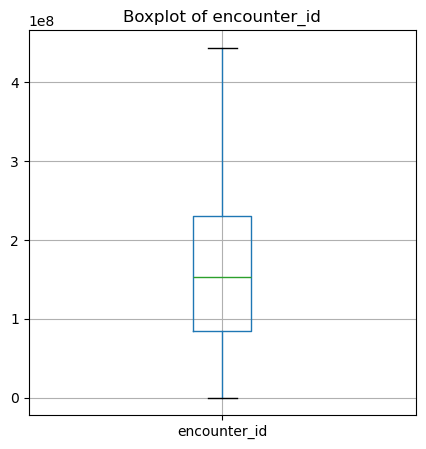

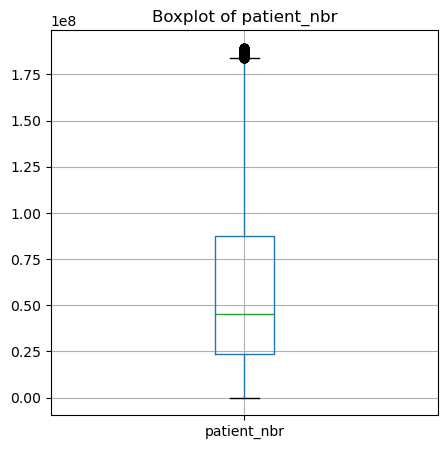

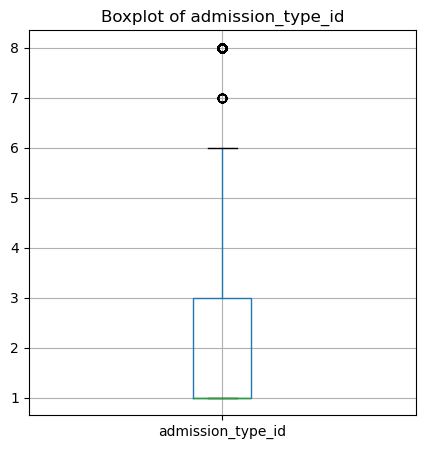

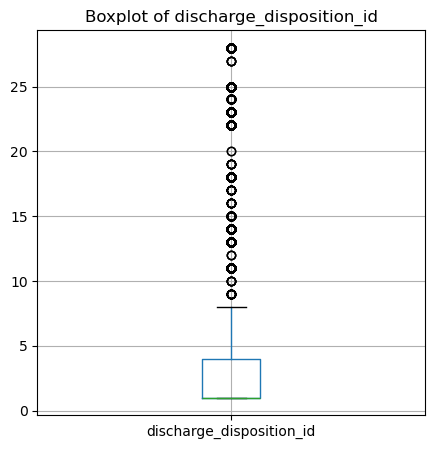

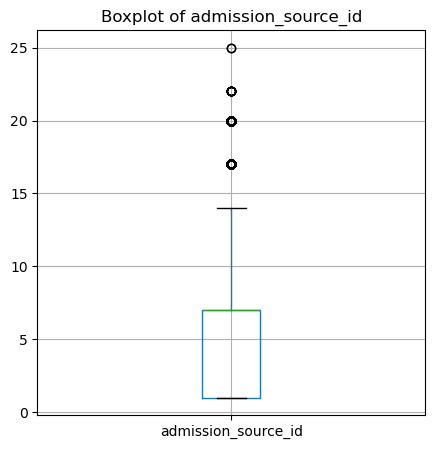

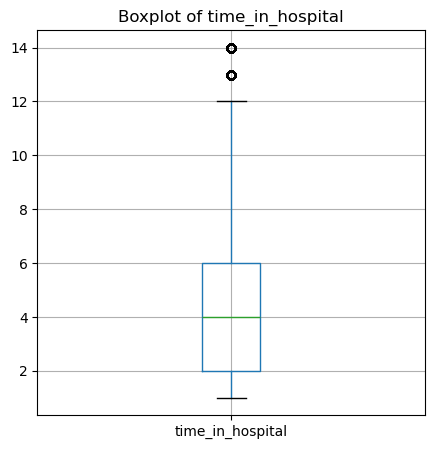

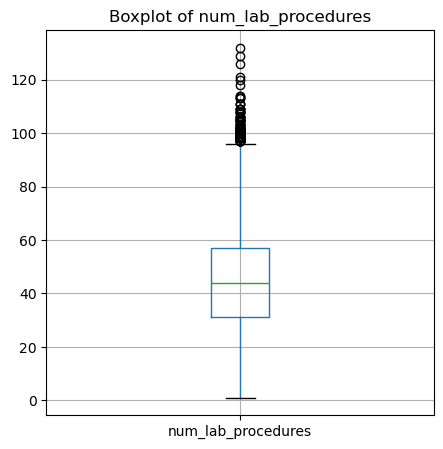

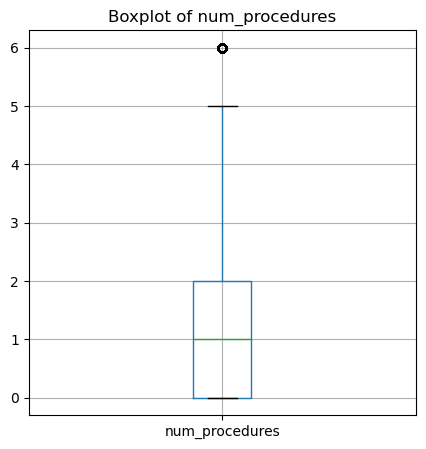

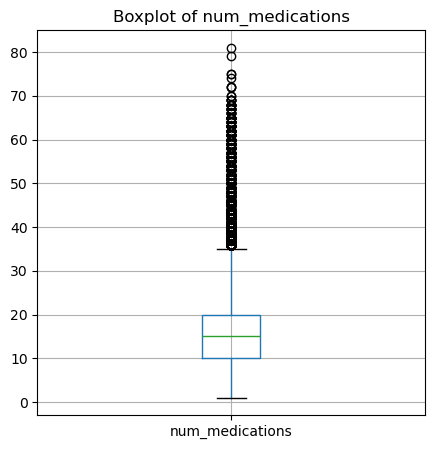

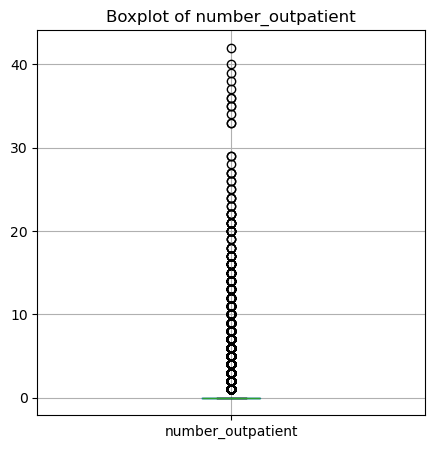

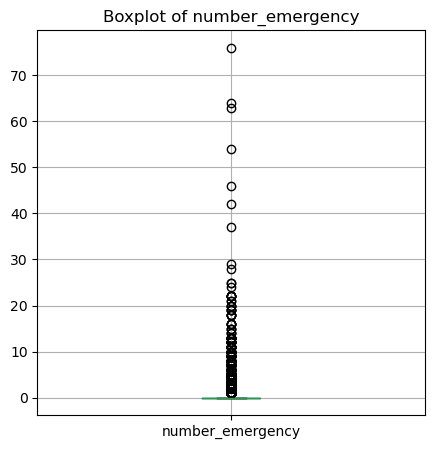

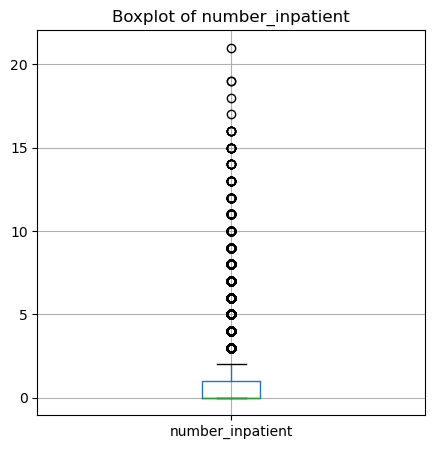

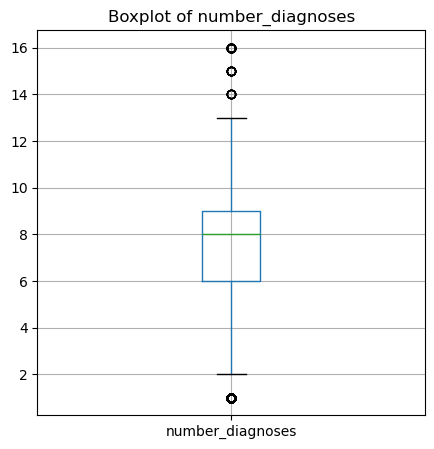

In [21]:
PBP(data)

<Figure size 800x600 with 0 Axes>

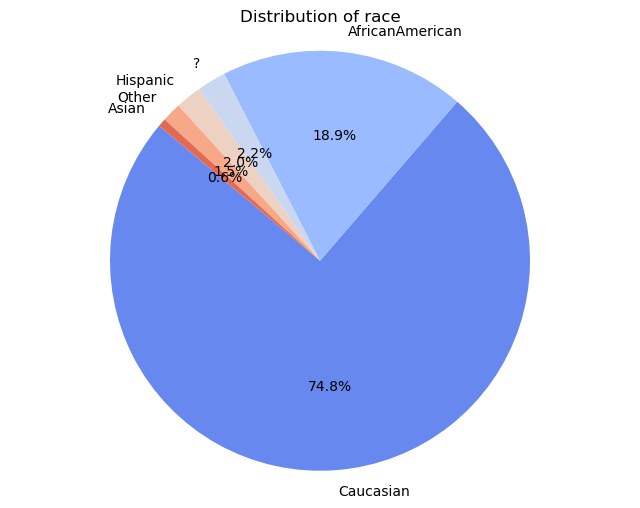

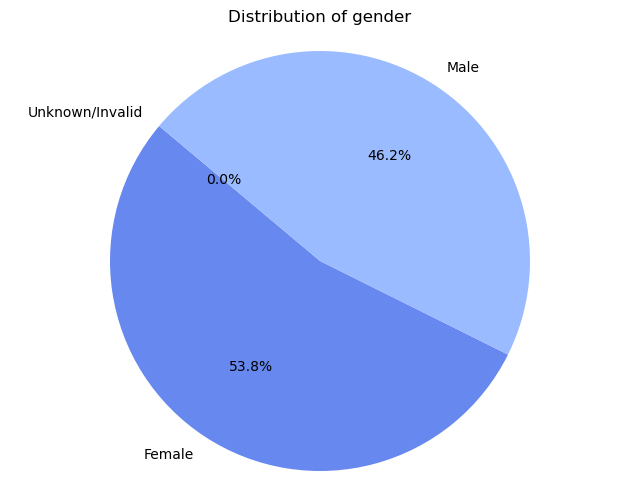

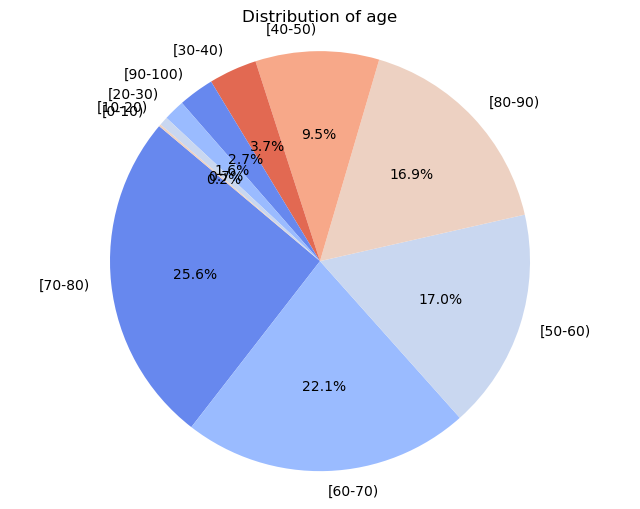

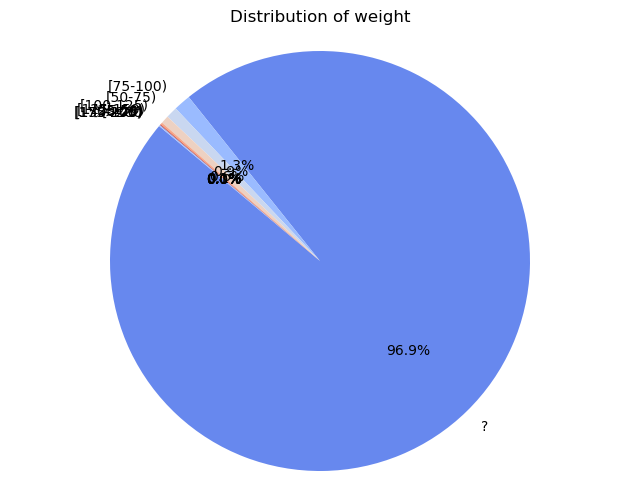

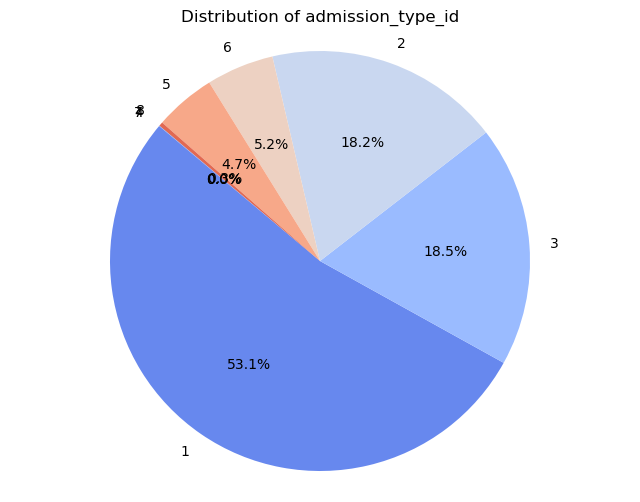

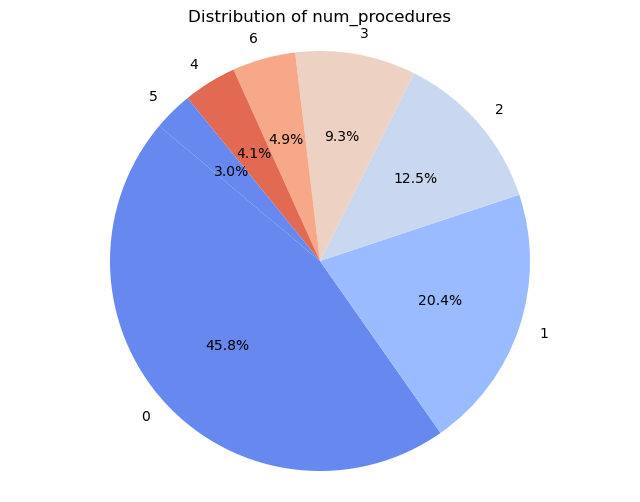

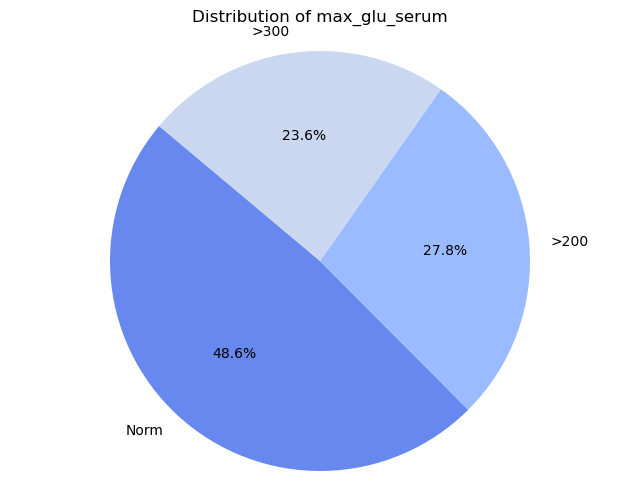

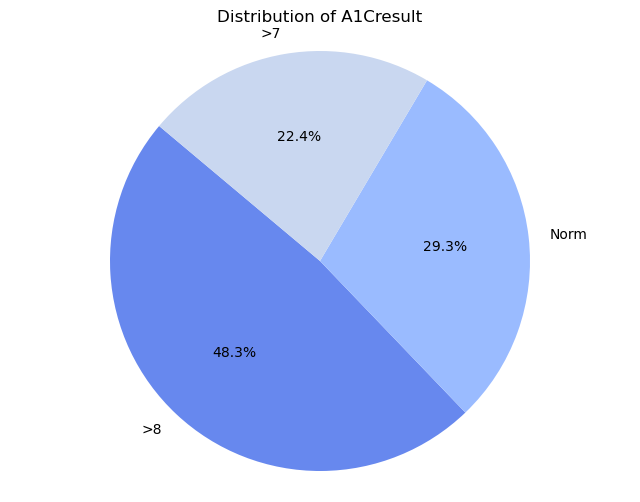

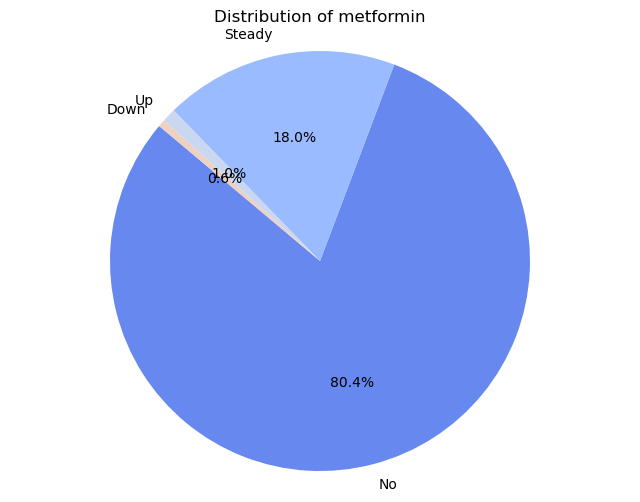

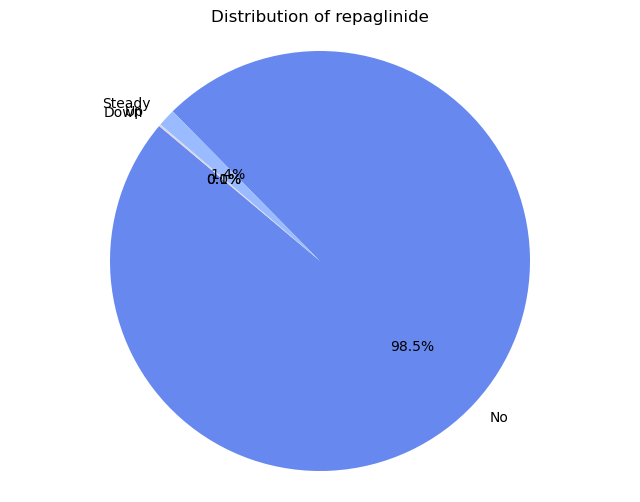

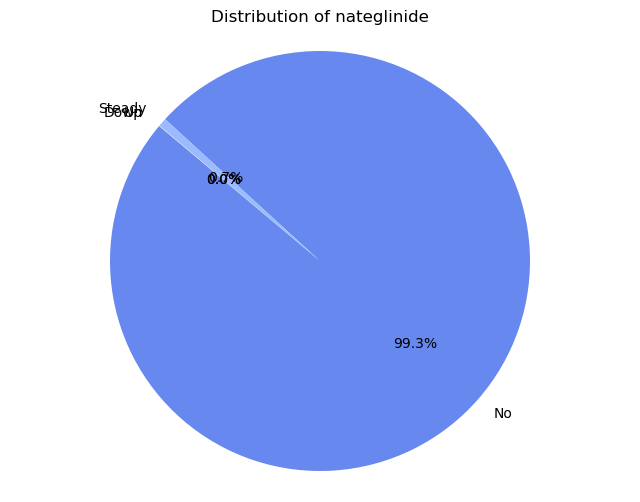

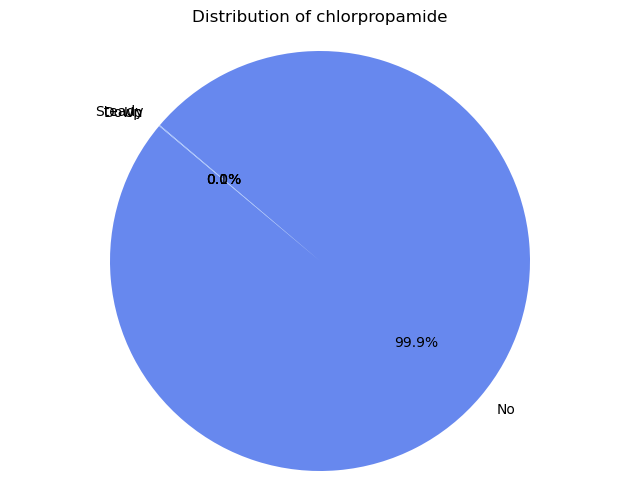

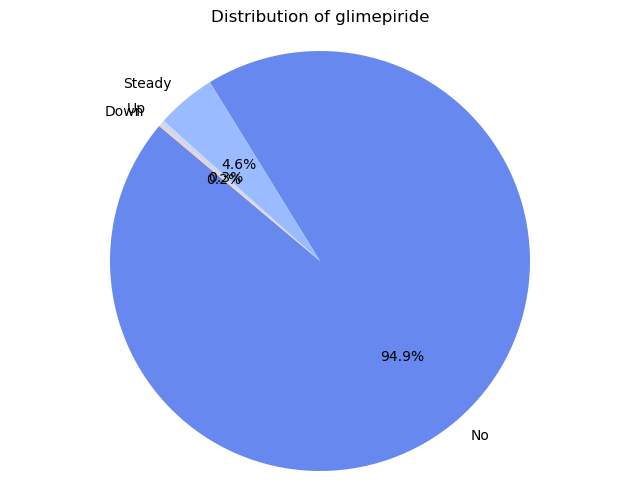

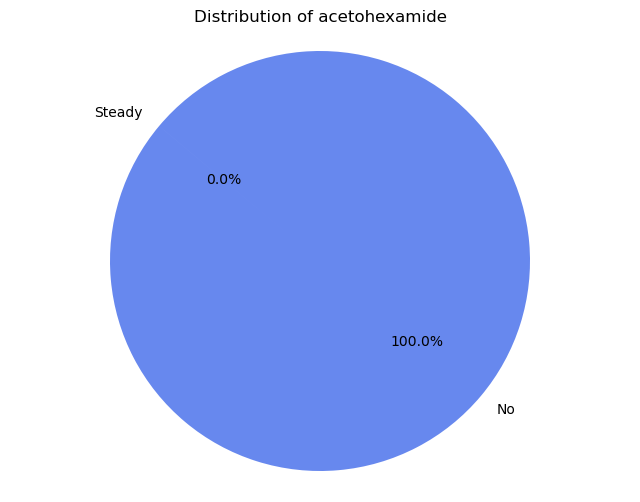

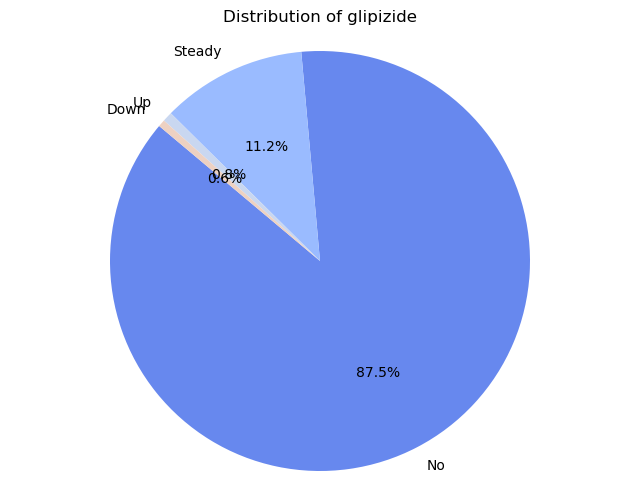

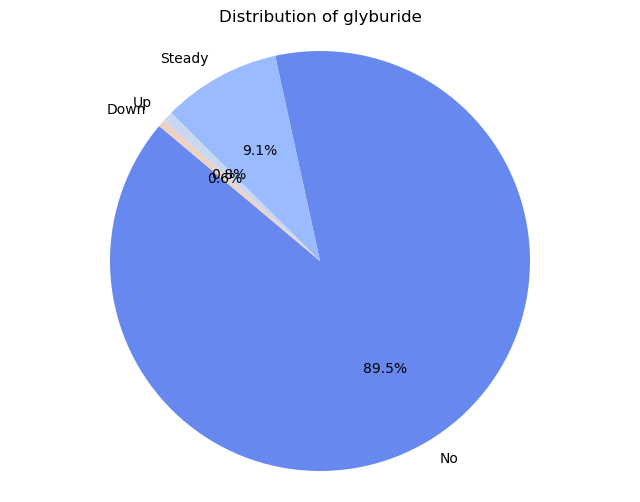

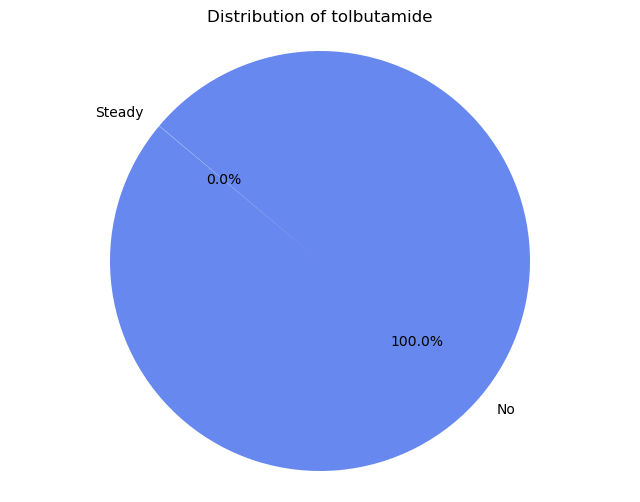

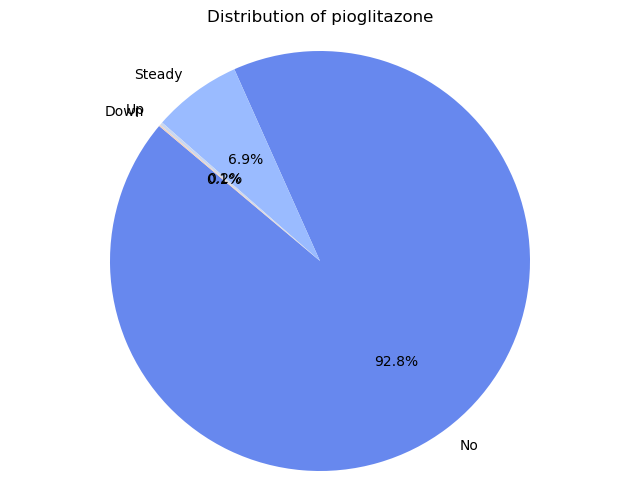

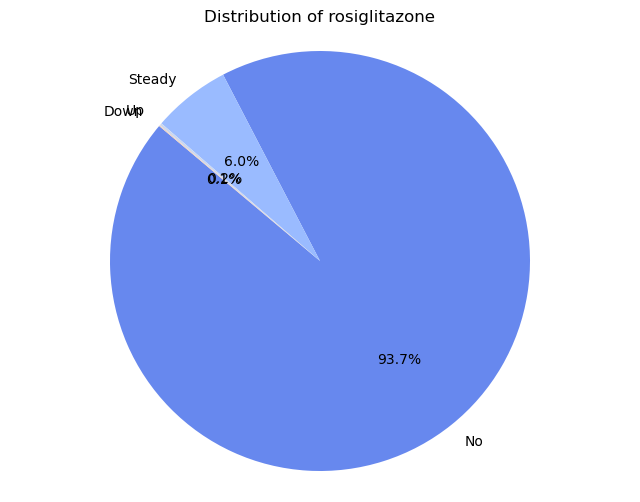

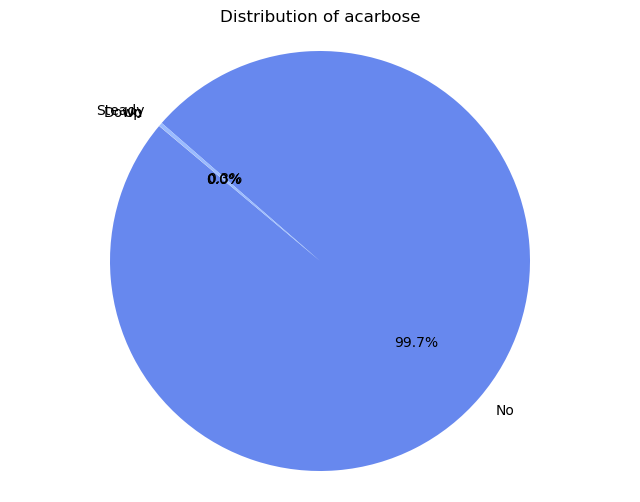

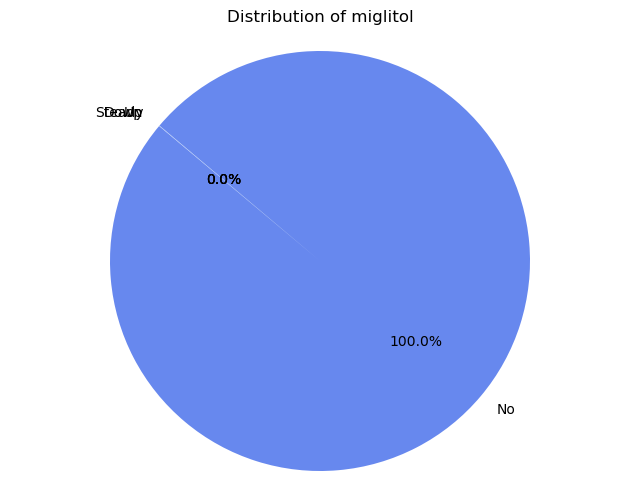

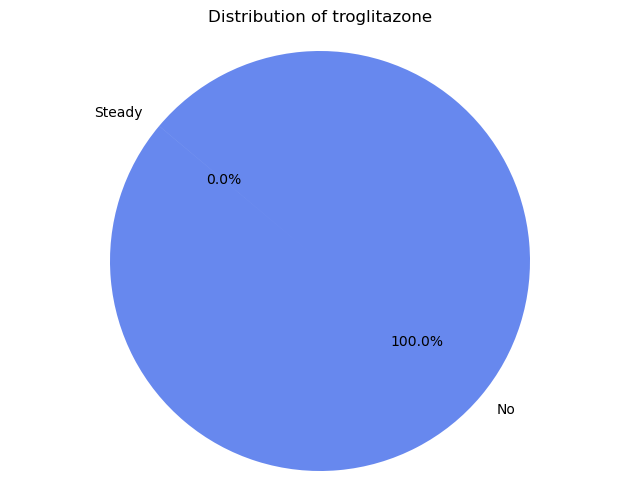

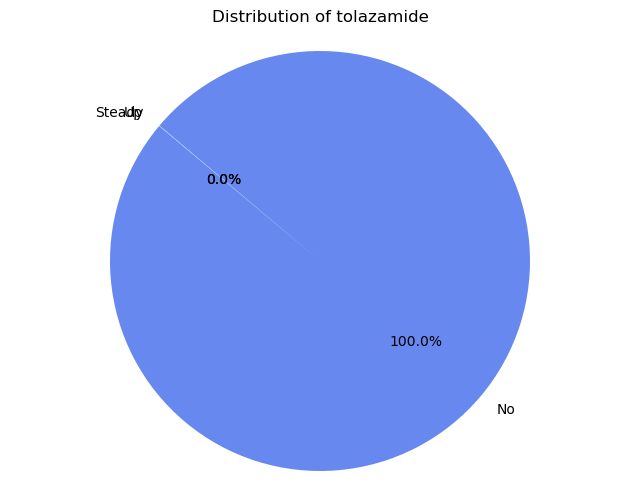

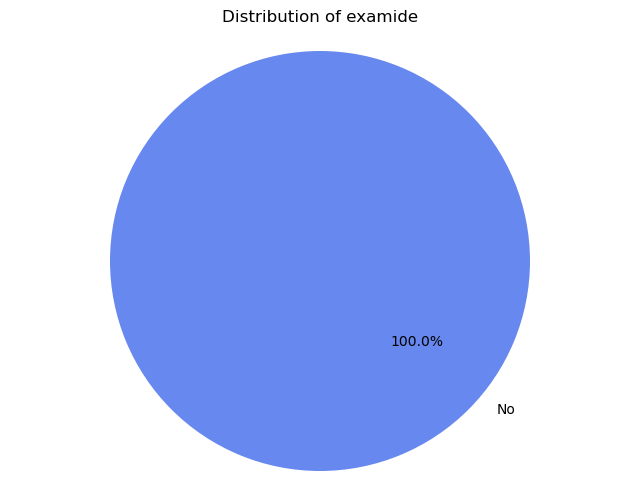

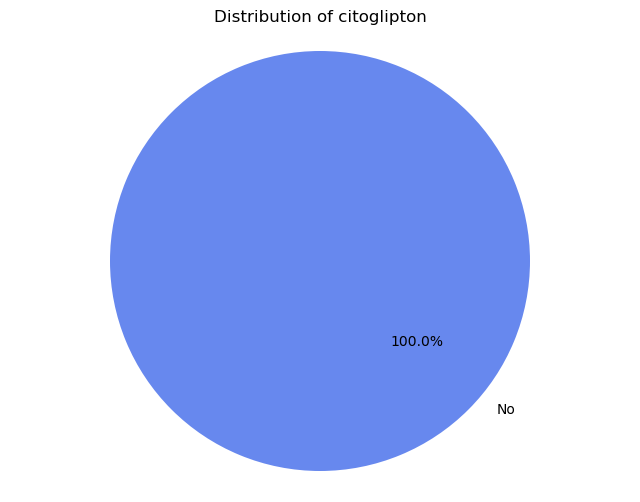

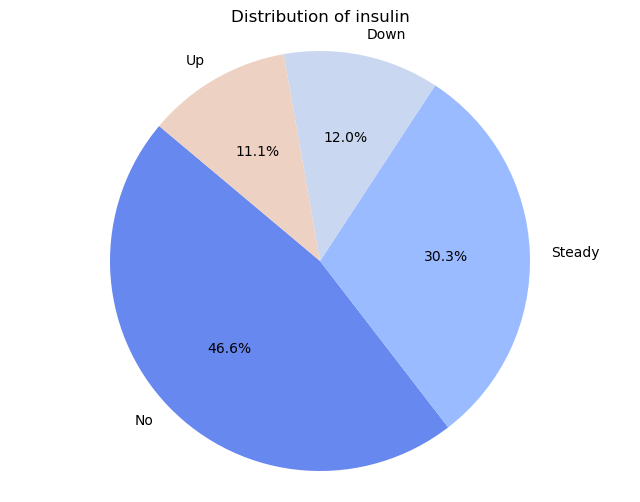

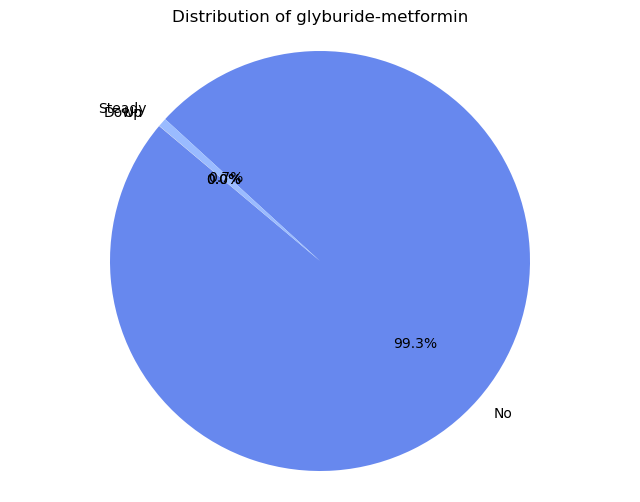

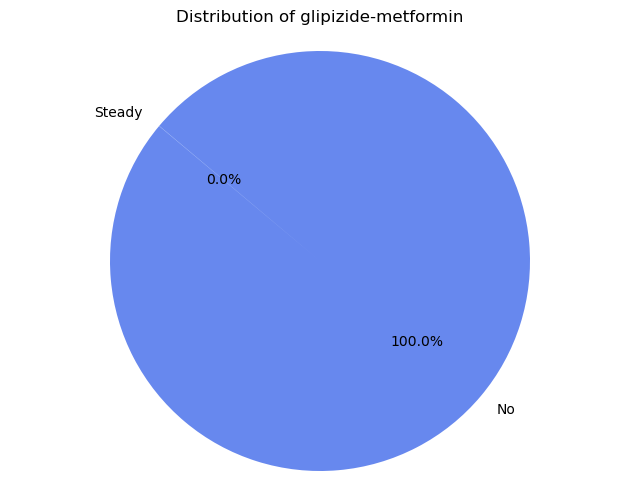

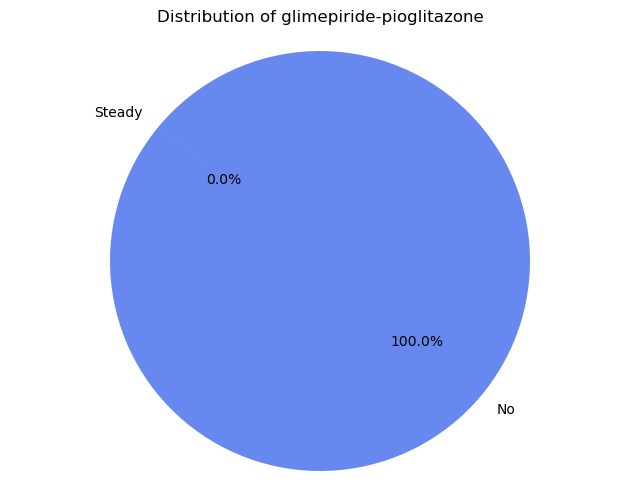

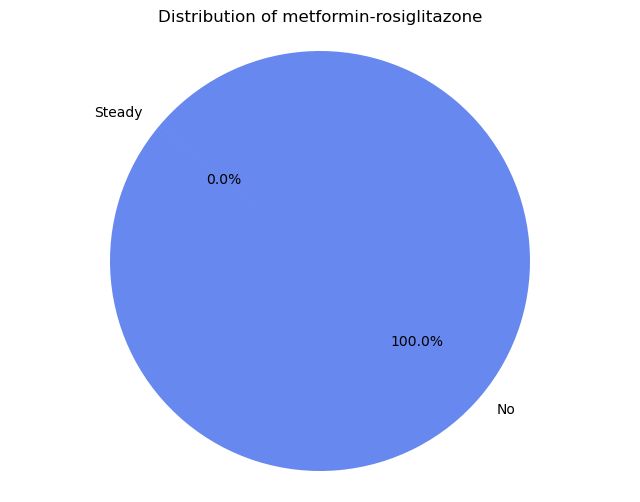

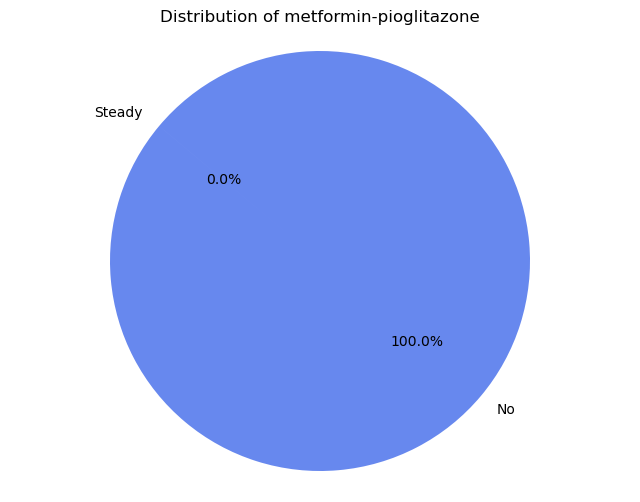

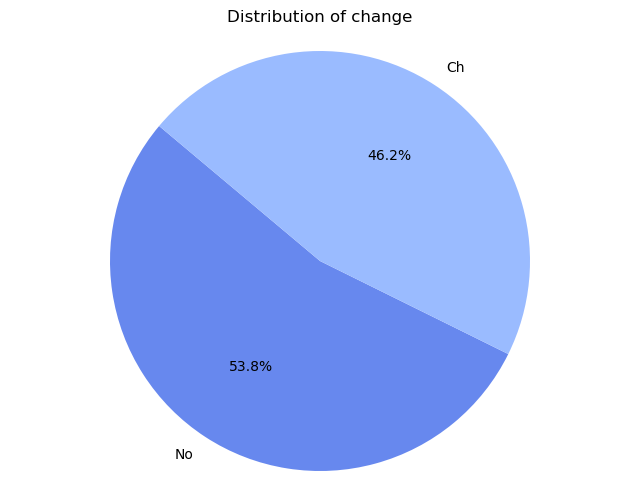

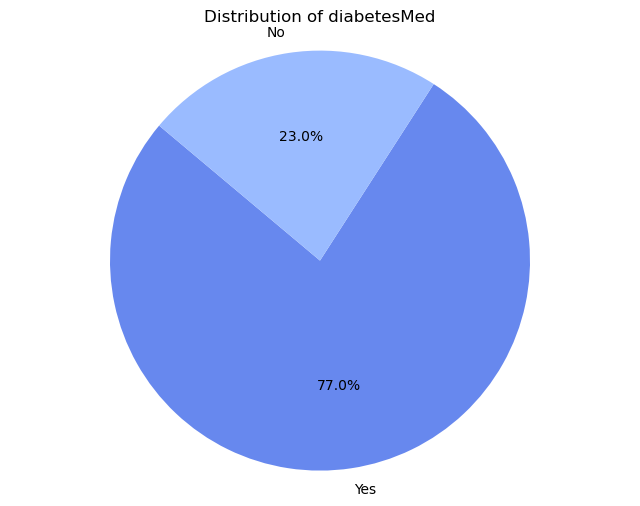

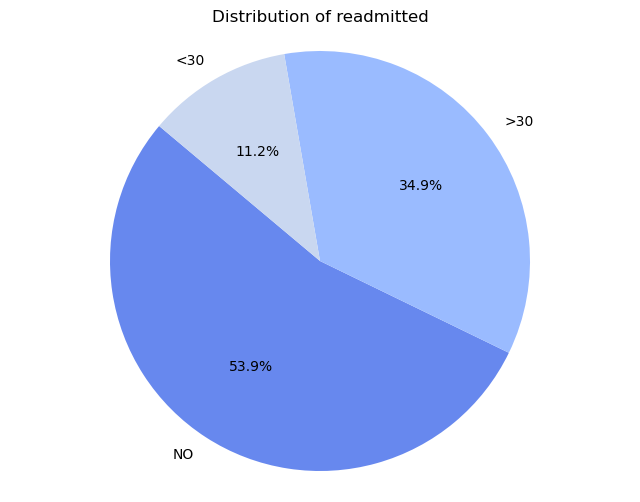

In [22]:
PlotPie(data)

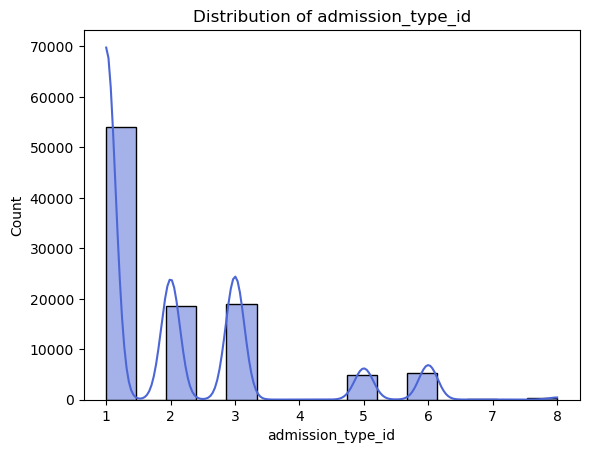

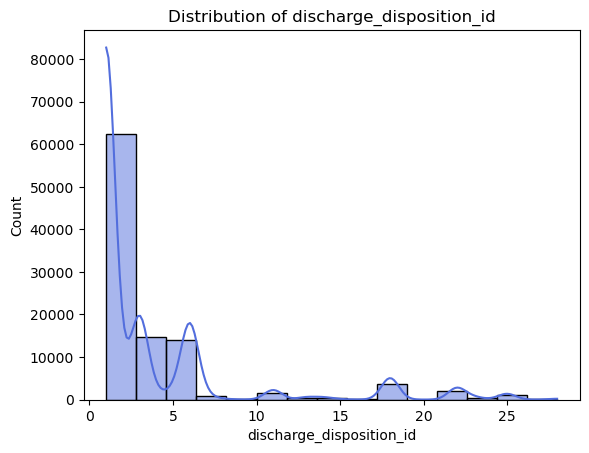

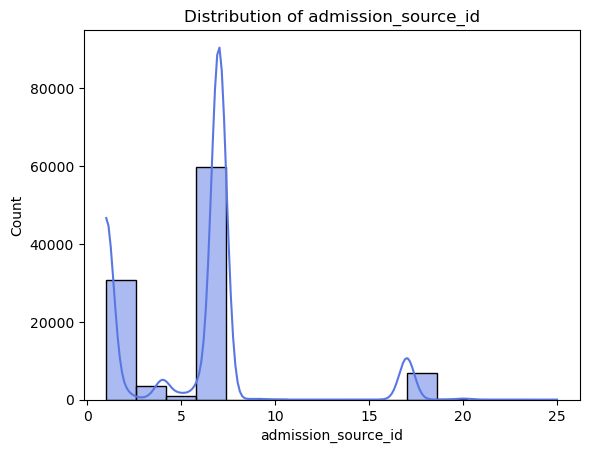

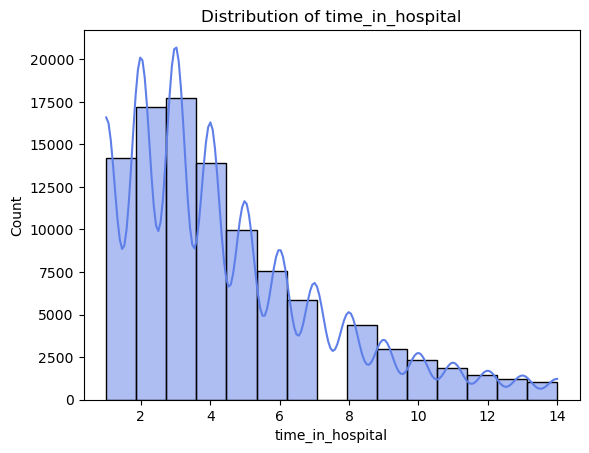

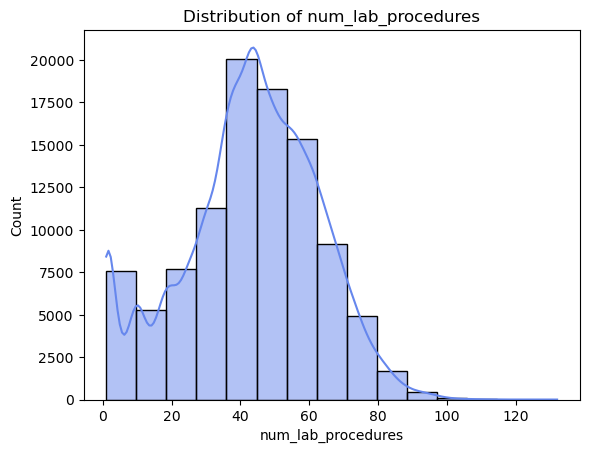

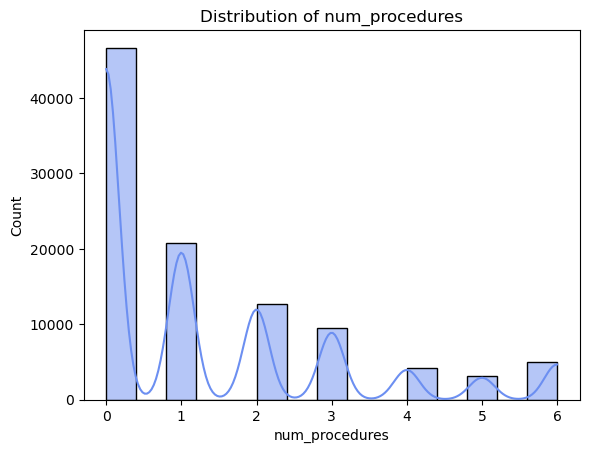

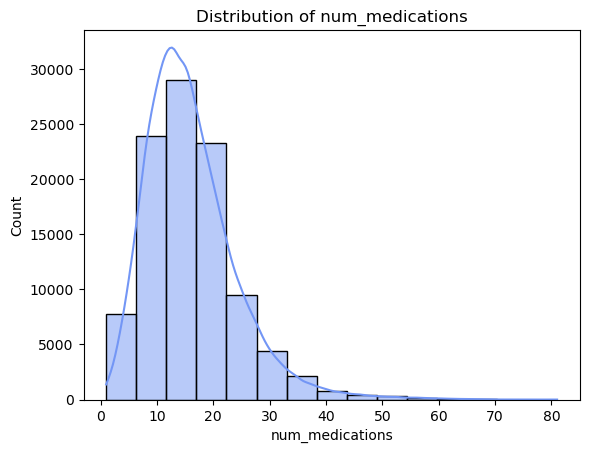

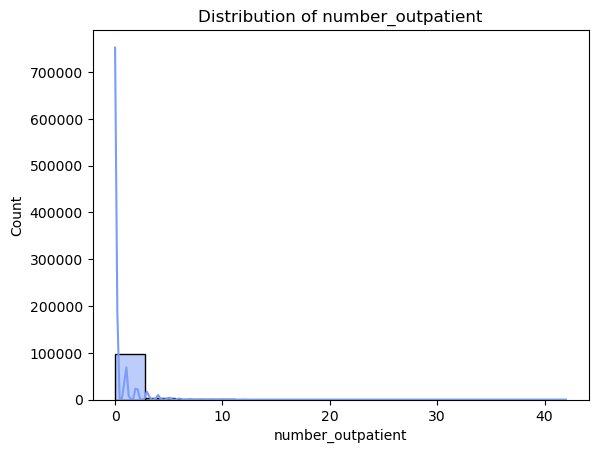

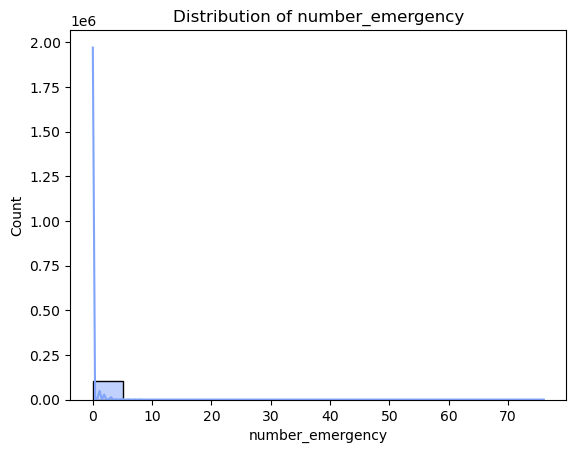

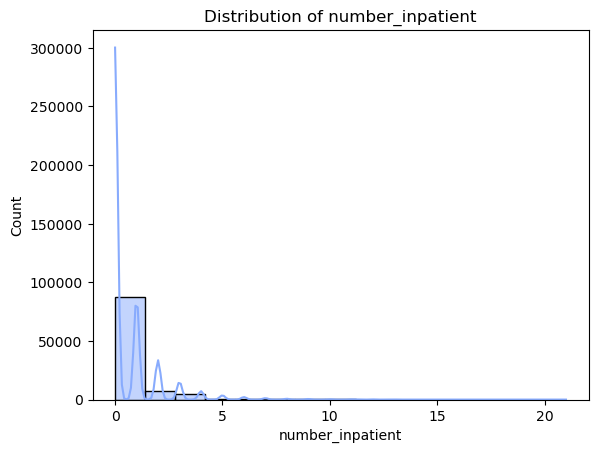

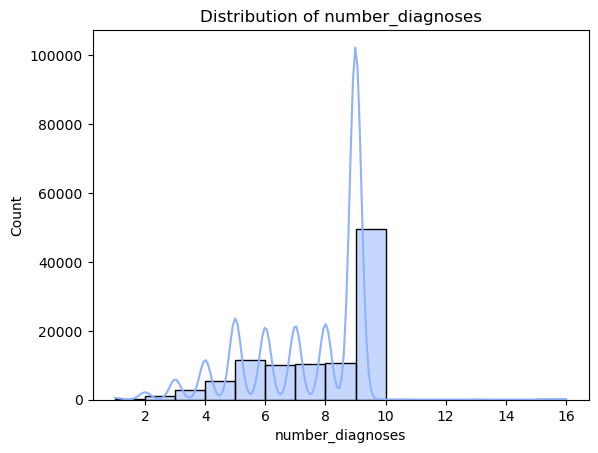

In [23]:
PDP(data)

# ***Pre-Processing Operations :***

In [24]:
data.drop(columns=[
    "encounter_id", "patient_nbr", "discharge_disposition_id", "admission_source_id" , "admission_type_id", 
    "repaglinide", "nateglinide", "chlorpropamide", "acetohexamide", "tolbutamide",
    "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton",
    "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone",
    "metformin-rosiglitazone", "metformin-pioglitazone","weight"
], inplace=True)


In [25]:
data.columns

Index(['race', 'gender', 'age', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [26]:
getValuesCounts(data)

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64 

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64 

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64 

time_in_hospital
3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64 

payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64 

medical_specialty
?        

#### medical_specialty, payer_code, race

##### The features these are we going to replace the '?' value with mean, median, mode or any suitable value 

In [27]:
columns = ["medical_specialty", "payer_code", "race"]


for col in columns:
    leastValue = data[col].value_counts().idxmin()
    data[col].replace('?',leastValue, inplace=True)

In [28]:
getValuesCounts(data)

race
Caucasian          76099
AfricanAmerican    19210
Asian               2914
Hispanic            2037
Other               1506
Name: count, dtype: int64 

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64 

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64 

time_in_hospital
3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64 

payer_code
FR    40257
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
Name: count, dtype: int64 

medical_specialty
Surgery-PlasticwithinHeadandNeck    49950
Inte

In [29]:
# Number of features 
data.shape[1]

28

In [30]:
data = data.rename(columns={
    "race": "patient_race",
    "gender": "patient_gender",
    "age": "patient_age_group",
    "time_in_hospital": "hospital_stay_days",
    "payer_code": "insurance_type",
    "medical_specialty": "doctor_specialty",
    "num_lab_procedures": "lab_tests_count",
    "num_procedures": "procedures_count",
    "num_medications": "medications_count",
    "number_outpatient": "past_outpatient_visits",
    "number_emergency": "past_emergency_visits",
    "number_inpatient": "past_inpatient_visits",
    "diag_1": "diagnosis_primary",
    "diag_2": "diagnosis_secondary",
    "diag_3": "diagnosis_additional",
    "number_diagnoses": "diagnoses_total",
    "max_glu_serum": "glucose_test_result",
    "A1Cresult": "A1C_test_result",
    "metformin": "med_metformin",
    "glimepiride": "med_glimepiride",
    "glipizide": "med_glipizide",
    "glyburide": "med_glyburide",
    "pioglitazone": "med_pioglitazone",
    "rosiglitazone": "med_rosiglitazone",
    "insulin": "med_insulin",
    "change": "medication_changed",
    "diabetesMed": "diabetes_medication",
    "readmitted": "readmission_status"
})


In [31]:
data["patient_age_group"].replace('[0-10)',"age < 10", inplace=True)
data["A1C_test_result"].replace('norm',"normal", inplace=True)
data["A1C_test_result"].replace('norm',"normal", inplace=True)

columns = ["med_metformin", "med_glimepiride", "med_glipizide", "med_glyburide", "med_pioglitazone", "med_rosiglitazone", "med_insulin"]
for col in columns :
    data[col].replace('No',"Unknown", inplace=True)

    
data["medication_changed"].replace('Ch',"Yes", inplace=True)
data["readmission_status"].replace('NO',"Unknown", inplace=True)


In [32]:
getValuesCounts(data)

patient_race
Caucasian          76099
AfricanAmerican    19210
Asian               2914
Hispanic            2037
Other               1506
Name: count, dtype: int64 

patient_gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64 

patient_age_group
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
age < 10      161
Name: count, dtype: int64 

hospital_stay_days
3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64 

insurance_type
FR    40257
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
Name: count, dtype: int64 

doctor_specialty
Surgery-Pla

In [33]:
# dropping data that the most of it is Unknown or Un-Recorded and the NaN
data.drop(columns=["med_rosiglitazone", "med_pioglitazone", "med_glyburide", "med_glipizide", "med_glimepiride", "med_metformin", "diagnosis_primary", "diagnosis_secondary", "diagnosis_additional","glucose_test_result","A1C_test_result"], inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   patient_race            101766 non-null  object
 1   patient_gender          101766 non-null  object
 2   patient_age_group       101766 non-null  object
 3   hospital_stay_days      101766 non-null  int64 
 4   insurance_type          101766 non-null  object
 5   doctor_specialty        101766 non-null  object
 6   lab_tests_count         101766 non-null  int64 
 7   procedures_count        101766 non-null  int64 
 8   medications_count       101766 non-null  int64 
 9   past_outpatient_visits  101766 non-null  int64 
 10  past_emergency_visits   101766 non-null  int64 
 11  past_inpatient_visits   101766 non-null  int64 
 12  diagnoses_total         101766 non-null  int64 
 13  med_insulin             101766 non-null  object
 14  medication_changed      101766 non-n

In [35]:
data.isna().sum()

patient_race              0
patient_gender            0
patient_age_group         0
hospital_stay_days        0
insurance_type            0
doctor_specialty          0
lab_tests_count           0
procedures_count          0
medications_count         0
past_outpatient_visits    0
past_emergency_visits     0
past_inpatient_visits     0
diagnoses_total           0
med_insulin               0
medication_changed        0
diabetes_medication       0
readmission_status        0
dtype: int64

In [36]:
data

,patient_race,patient_gender,patient_age_group,hospital_stay_days,insurance_type,doctor_specialty,lab_tests_count,procedures_count,medications_count,past_outpatient_visits,past_emergency_visits,past_inpatient_visits,diagnoses_total,med_insulin,medication_changed,diabetes_medication,readmission_status
0,Caucasian,Female,age < 10,1,FR,Pediatrics-Endocrinology,41,0,1,0,0,0,1,Unknown,No,No,Unknown
1,Caucasian,Female,[10-20),3,FR,Surgery-PlasticwithinHeadandNeck,59,0,18,0,0,0,9,Up,Yes,Yes,>30
2,AfricanAmerican,Female,[20-30),2,FR,Surgery-PlasticwithinHeadandNeck,11,5,13,2,0,1,6,Unknown,No,Yes,Unknown
3,Caucasian,Male,[30-40),2,FR,Surgery-PlasticwithinHeadandNeck,44,1,16,0,0,0,7,Up,Yes,Yes,Unknown
4,Caucasian,Male,[40-50),1,FR,Surgery-PlasticwithinHeadandNeck,51,0,8,0,0,0,5,Steady,Yes,Yes,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),3,MC,Surgery-PlasticwithinHeadandNeck,51,0,16,0,0,0,9,Down,Yes,Yes,>30
101762,AfricanAmerican,Female,[80-90),5,MC,Surgery-PlasticwithinHeadandNeck,33,3,18,0,0,1,9,Steady,No,Yes,Unknown
101763,Caucasian,Male,[70-80),1,MC,Surgery-PlasticwithinHeadandNeck,53,0,9,1,0,0,13,Down,Yes,Yes,Unknown
101764,Caucasian,Female,[80-90),10,MC,Surgery-General,45,2,21,0,0,1,9,Up,Yes,Yes,Unknown


In [37]:
data.to_json("UCI_Patients_Preprocessed.json", orient="records", lines=True)